In [ ]:
pip install requests matplotlib numpy scipy seaborn pandas

In [2]:
import requests

In [3]:
def getPeriodsByYear(year):
    url = "https://www.glo.or.th/api/lottery/getPeriodsByYear"
    payload = {"type": "CHECKED", "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]
        return None

    except Exception as e:
        print(f"Error: {e}")

In [5]:
def removeDuplicatePeriods(data_api):
    result = []
    for e in data_api:
        result.append(e["date"])
    return list(dict.fromkeys(result))

In [7]:
def getLotteryResult(date, month, year):
    url = "https://www.glo.or.th/api/checking/getLotteryResult"
    payload = {"date": str(date), "month": str(month), "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]["data"]
        return None
    
    except Exception as e:
        print(f"Error: {e}")

In [14]:
import time

def groupPrizesByYear(start_year, end_year):  
    result = {
        "first": [],
        "second": [],
        "third": [],
        "fourth": [],
        "fifth": [],
        "last2": [],
        "last3f": [],
        "last3b": [],
        "near1": []
    }
    for year in range(int(start_year), int(end_year) + 1):
        periods = getPeriodsByYear(str(year))
        periods = removeDuplicatePeriods(periods)
        print(f"*** year: {year} ***")    
        for period in periods:
            [year_, month, date] = period.split("-")
            data_api = getLotteryResult(date, month, year_)
            for key, value in data_api.items():
                for number in value["number"]:
                    result[key].append(int(number["value"]))
            print(f"{period}: checked")
            time.sleep(5)
        print("*" * 50)
    return result

In [15]:
start_year = "2023"
end_year = "2024"
data = groupPrizesByYear(start_year, end_year)

*** year: 2023 ***
2023-12-30: checked
2023-12-16: checked
2023-12-01: checked
Error: HTTPSConnectionPool(host='www.glo.or.th', port=443): Max retries exceeded with url: /api/checking/getLotteryResult (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022584A0B250>: Failed to resolve 'www.glo.or.th' ([Errno 11001] getaddrinfo failed)"))


AttributeError: 'NoneType' object has no attribute 'items'

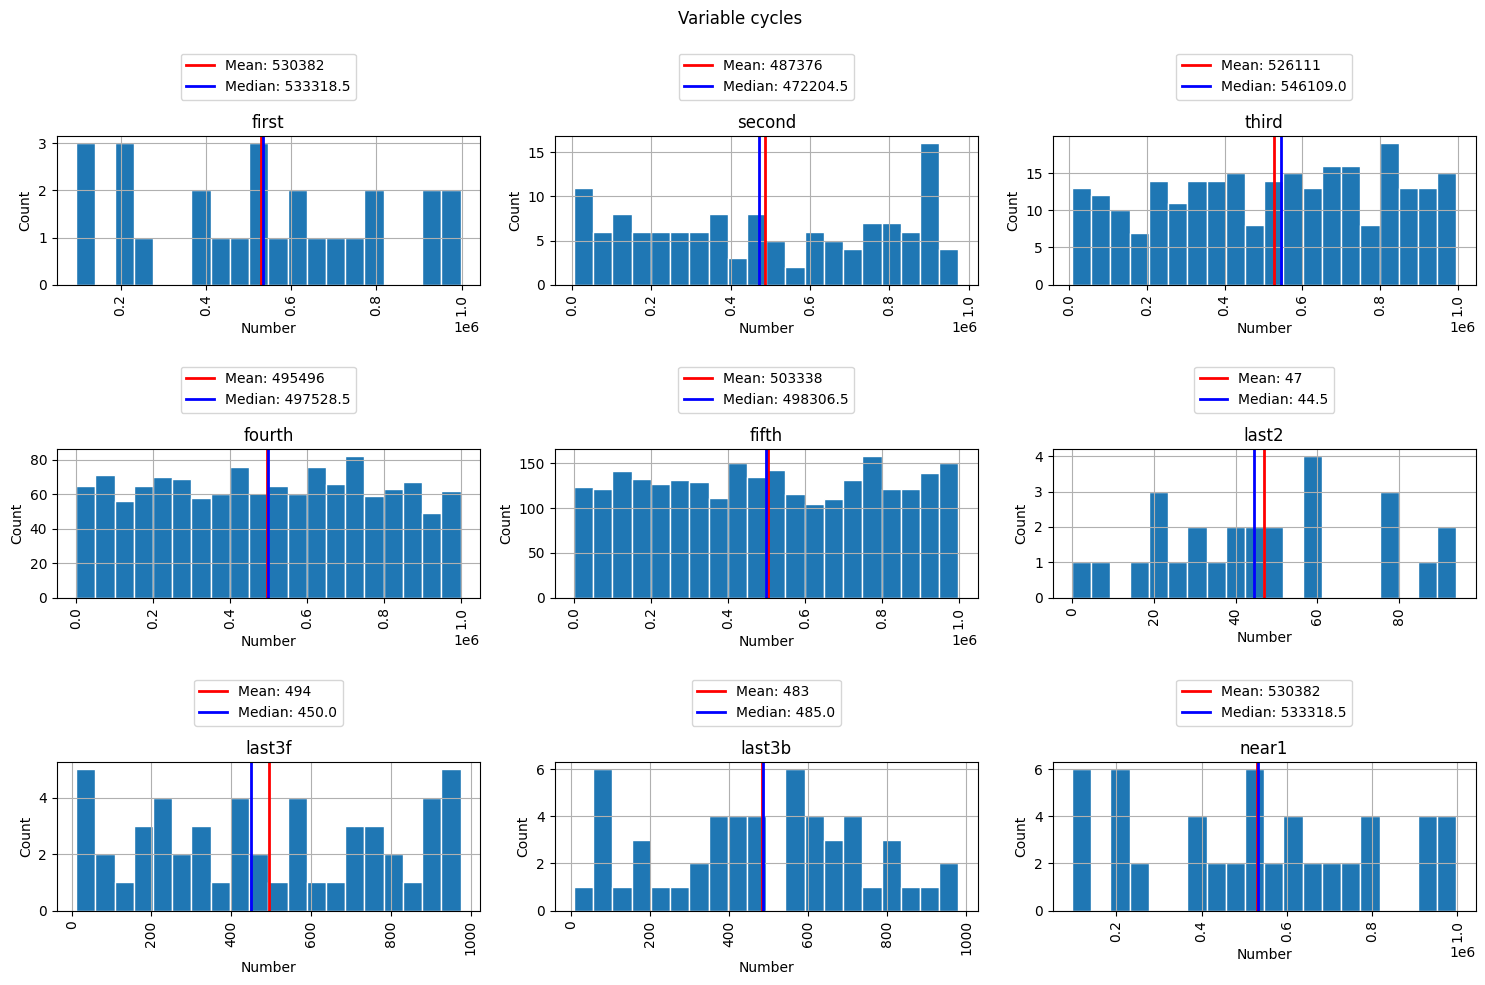

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

f,ax = plt.subplots(3,3, figsize=(15, 10))
ax = ax.ravel()
f.suptitle(f"Lottery: {start_year} - {end_year}")

for idx, (key, values) in enumerate(data.items()):
    mean = int(np.mean(values))
    std = int(np.std(values))
    median = np.median(values)
    # mode = stats.mode(values)
    # print(mode)

    ax[idx].axvline(x=mean, linewidth=2, color='r', label=f'Mean: {mean}')
    ax[idx].axvline(x=median, linewidth=2, color='b', label=f'Median: {median}')
    ax[idx].tick_params(axis='x', rotation=90)
    # The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 
    ax[idx].hist(values, edgecolor='white', bins=20)
    ax[idx].set_title(f"{key}")
    ax[idx].set_xlabel("Number")
    ax[idx].set_ylabel("Count")
    ax[idx].legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=1)
    ax[idx].grid()

plt.tight_layout()